### Analyse the Publications data from Kenya

So we managed to download about 25,000 paper abstracts with meta-data from Kenyan Authors. Now we need to makse sense of these data and identify trends. We are asking questions like:

1. Changes in the number of papers published over time (Yearly)
2. Changes in the number of open acces papers over the years (Keep in mind that access of the lack thereof maybe linked to embargo periods)
3. Colaboration trends (How can we get this information?
4. What else can we find out?

#### First we'll load the required modules

In [2]:
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
from ggplot import *

/home/user/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/user/anaconda3/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


#### Then import the data

In [3]:
data = pd.read_csv('../Data/PMID_PMC_Journal_Year_Kenya.csv', index_col='pmid')

In [4]:
data.head()

,pmcid,isopen,journal,date,year,month
pmid,,,,,,
30165703,NaN,closed,J Infect Dis,2018-08-24,2018.0,8.0
30165548,NaN,closed,J Infect Dis,2018-08-27,2018.0,8.0
30165370,PMC6117160,open,PLoS One,2018-08-30,2018.0,8.0
30161172,PMC6116983,open,PLoS One,2018-08-30,2018.0,8.0
30158702,NaN,closed,Nature,2018-09-01,2018.0,9.0


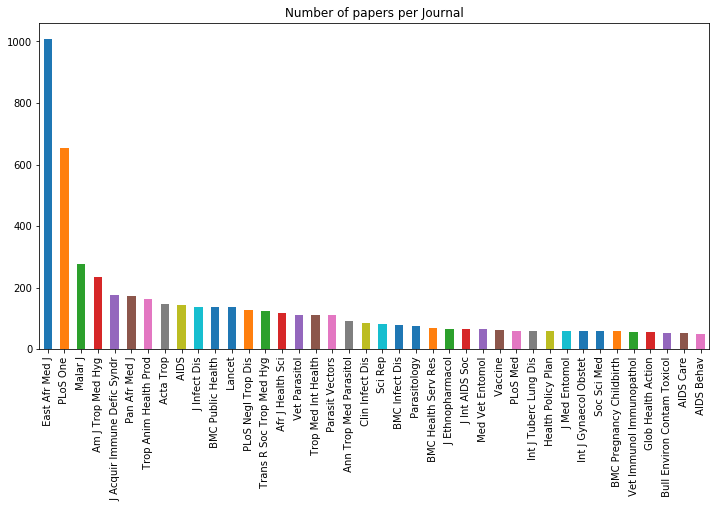

In [6]:
plot_journals = data.journal.value_counts()[data.journal.value_counts() > 50]
plot_journals.plot(kind='bar', title='Number of papers per Journal', figsize=(12, 6))
plt.savefig('../plots/papers_per_jornal_kenya.png')  # saves the current figure

From the figure above, we can observe that the East Africa Medical Journal is by far the most popular follwed by Plos One Journal for Kenyan Authors. This is followed in a distant second by Malaria Journal. Most of these are journals specific to the diseases affecting Africa: Malaria and Negelected Tropical dieseases. 


### Number of Journals per Year

Now we need to check if the number of Journals Published By Kenyans over the years. 

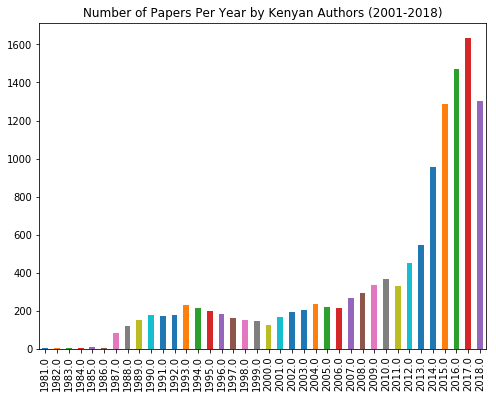

In [7]:
data[(data.year > 1980) & (data.year < 2019)]['year'].\
value_counts().sort_index().plot(kind='bar',
                                 title='Number of Papers Per Year by Kenyan Authors (2001-2018)',
                                 figsize=(8, 6))
plt.savefig('../plots/papers_per_year_Kenya.png')  # saves the current figure

Either we are missing some data or there was a drastic increase in the number of papers published by Kenyan authors after 2007. Why? Turns out the data was not correctly captured in our initial analysis

#### Are the published papers openly accessible?

Having established the

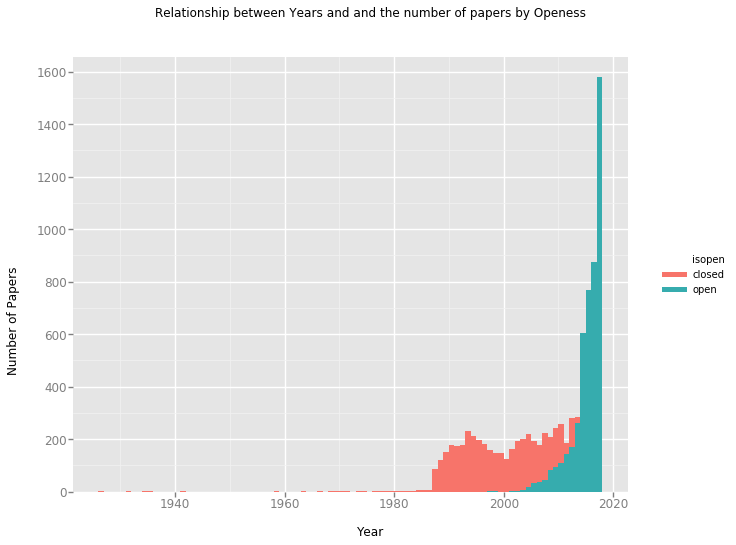

In [8]:
p=ggplot(data, aes(x='year', fill='isopen')) +\
    geom_histogram(binwidth=1) + \
ggtitle("Relationship between Years and and the number of papers by Openess") \
+ xlab("Year") + ylab("Number of Papers")

p.save('../plots/statusOpennessYear_Kenya.png')

We can clearly observe that there has been a shift from Closed Access towards Open Access, which of course can be explained by the general shift in the filed.

In [ ]:
ggplot(data , aes(x = 'year', y = 'month',
                color='isopen')) + geom_point() + \
ggtitle("Relationship between Month and Year and Openness") \
+ xlab("Year") + ylab("Month")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


The above plot simply shows the shift towards open access journals happended after 2000s.

### Who is driving the adoption of preprints?

#### 1. Read the data from file 

In [11]:
data_country = pd.read_table('../Data/preprint_country_counts.txt',
                             header=None, names=['Country','Count'])

In [12]:
data_country.set_index('Country', inplace=True)
data_country.sort_values(by='Count', ascending=False, inplace=True)

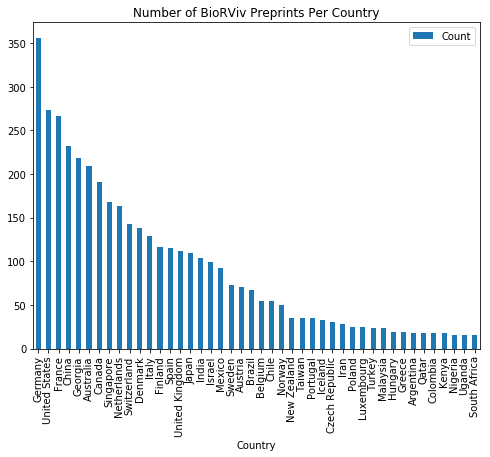

In [20]:
data_country[data_country.Count > 14].plot(
    kind='bar',figsize=(8, 6),
    title='Number of BioRViv Preprints Per Country',)

Out of the 20,069 papers in downloaded from bioRXiv, only 18 have Kenyan authors,majority of which are as a results of international (16) collaborations. Although, the data is not large, we can confidently deduce that the adoption of preprints is being driven by international collaborators. Therefore, this is an area that would required further senstization and training. 

Overall, Kenya is leading Africa in this adoption. While this could be a reflection of the kind of collaborations, comparing with South Africa, which collaborates heavily internationally, we can say Kenya is taking some lead.

These deductions are only limitted to the use of bioRXiv. 

The top African Countries using pre-prints include:
- Kenya: 18
- Nigeria: 	16
- Uganda: 	15
- South Africa: 15

Clearly, compared with other countries in the world, the adoption of preprints in Africa still lacks behind. 


In [17]:
data_country[data_country.Count > 14]

,Count
Country,
Germany,356
United States,273
France,266
China,232
Georgia,218
Australia,209
Canada,191
Singapore,168
Netherlands,163
